# An Overview Of The Dataset!

There are 4 csv files, `nyra_race_table`, `nyra_start_table`, `nyra_tracking_table` and `nyra_2019_complete` (compilation of the the 3 files).

We'll introduce you to all of them in good time, but for now we're looking at **`nyra_race_table.csv`**
<br/>

* **track_i**: A 3 character id for the track (location) the race took place at. AQU - Aqueduct, BEL - Belmont, SAR - Saratoga.<br/>
* **race_date**: The date the race took place. YYYY-MM-DD.<br/>
* **race_number**: Number of the race as 3 characters.<br/>
* **distance_id**: Distance of the race in furlongs passed as an integer.<br/> For example, 600 would be 6 furlongs. A furlong is a measure of distance in the united states and is equal to one eighth of a mile, or approximately 201 metres.<br/>
* **course_type**: The course the race was run over passed as one character. <br/>M - Hurdle, D - Dirt, O - Outer turf, I - Inner turf, T - turf.<br/>
* **track_condition**: The condition of the course the race was run on passed as three characters. <br/>YL - Yielding, FM - Firm, SY - Sloppy, GD - Good, FT - Fast, MY - Muddy, SF - Soft.<br/>
* **run_up_distance**: Distance in feet of the gate to the start of the race passed as an integer.<br/>
* **race_type**: The classification of the race passed as as five characters. <br/>STK - Stakes, WCL - Waiver Claiming, WMC - Waiver Maiden Claiming, SST - Starter Stakes, SHP - Starter Handicap, CLM - Claiming, STR - Starter Allowance, AOC - Allowance Optionl Claimer, SOC - Starter Optional Claimer, MCL - Maiden Claiming, ALW - Allowance, MSW - Maiden Special Weight.<br/>
* **purse**: Purse in US dollars of the race.<br/>
* **post_time**: Time of day the race.<br/> For example - 01220 would be 12:20.




### 1. Importing libraries, Reading files

In [5]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
path = '/content/drive/MyDrive/Kaggle/derby/'

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
race_df = pd.read_csv(path+'nyra_race_table.csv')
race_df.head()

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220


In [12]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   track_id         2000 non-null   object
 1   race_date        2000 non-null   object
 2   race_number      2000 non-null   int64 
 3   distance_id      2000 non-null   int64 
 4   course_type      2000 non-null   object
 5   track_condition  2000 non-null   object
 6   run_up_distance  2000 non-null   int64 
 7   race_type        2000 non-null   object
 8   purse            2000 non-null   int64 
 9   post_time        2000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 156.4+ KB


There are no missing/invalid values. Hence, we proceed.

### 2. Data Visualisation - Racing Table


Let's find out the most raced locations.

In [17]:
def get_column(df):
    cat=[x for x in df.columns if df[x].dtype=='object']
    num=[x for x in df.columns if df[x].dtype!='object']
    return cat, num

cat, num=get_column(race_df)

In [37]:
def plot_bar(df,col_name_,agg_col,color_):
    palette = sns.set_palette("pastel", 10)
    std_df = pd.DataFrame(df.groupby(col_name_)[agg_col].count()).reset_index();
    std_df[str(agg_col)+'_ratio'] = 100*(std_df[agg_col]/df.shape[0])
    std_df = std_df.sort_values(by=agg_col,ascending=False)
    order = std_df[col_name_]
    if col_name_ in ['purse','post_time']:
        plt.figure(figsize=[48,4]);
    else:
        plt.figure(figsize=[12,4]);
    plt.subplot(1,2,1);
    g = sns.countplot(data=df,x=col_name_,order=order);
    plt.ylabel('Frequency');
    plt.title('Distribution of '+str(col_name_));
    
    temp_df = std_df.T
    temp_df.columns = temp_df.loc[col_name_,:].values
    temp_df = temp_df.drop(index=col_name_)
    temp_df.index = ['Count','Ratio(%)']

    display(temp_df)

,AQU,BEL,SAR
Count,825,772,403
Ratio(%),41.25,38.6,20.15


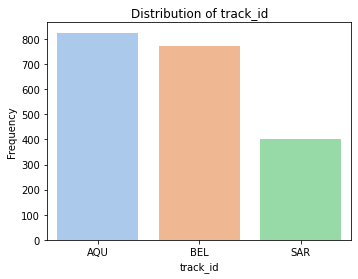

In [38]:
plot_bar(race_df,'track_id','course_type','')

We can see that about 41% of the races are conducted at AQU - Aqueduct, 825 of the total races, followed by BEL - Belmont, with 772 races, or about 38% of the total, and the third most raced location is SAR - Saratoga, with 403 races, or 20% of the total.

But which course type of races account for the majority?<br/>
(M - Hurdle, D - Dirt, O - Outer turf, I - Inner turf, T - turf)

,D,T,I,O,M
Count,1351,324,249,67,9
Ratio(%),67.55,16.2,12.45,3.35,0.45


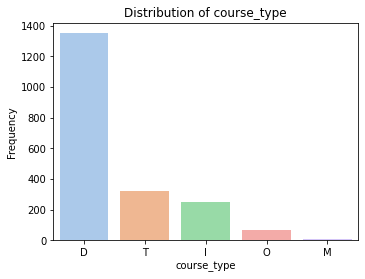

In [39]:
plot_bar(race_df,'course_type','track_id','')

Dirt races have been held 1,351 times, for more than 67% of the total. Turf and inner turf races have been held more than 200 times, accounting for more than 10% of the total, while outer turf races have been held 67 times, accounting for less than 4% of the total. Hadle has been held 9 times, accounting for less than 0.5% of the total. The type of course will definitely affect the horse's speed, as well as his jockey's drafting technique.

Along the same lines, after course types, let's see what the prevalent track conditions are. <br/>
FT - fast: dry, even, resilient surface <br/>
GD - good: a track that is almost fast <br/>
MY - muddy: a track that is wet but has no standing water <br/>
SY - sloppy: a track saturated with water, with visible standing water <br/>

,FT,SY,GD,MY
Count,978,207,92,74
Ratio(%),72.390822,15.321984,6.809771,5.477424


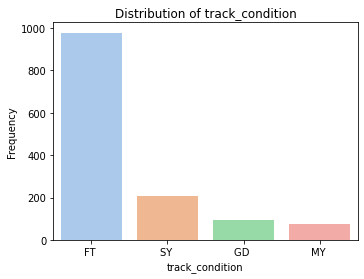

In [42]:
plot_bar(race_df[race_df['course_type']=='D'],'track_condition','track_id','')

Fast track is the dominant track condition, accounting for 72% of the total. Second in line is Sloppy, easily one-fifths of fast track; about 15%. Good and Muddy make up for the remaining 11%. 

Turf track conditions are separate. They are: <br/>
FM - firm: a firm, resilient surface.<br/>
GD - good: a turf course slightly softer than firm.<br/>
YL - yielding: a turf course with a more amount of "dive" to the ground due to recent rain.<br/>
SF - soft : a turf course with a large amount of moisture. Horses sink very deeply into it. Not favourable!<br/>


,FM,GD,YL,SF
Count,455,161,30,3
Ratio(%),70.107858,24.807396,4.622496,0.46225


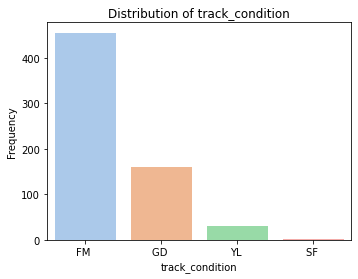

In [44]:
plot_bar(race_df[race_df['course_type']!='D'],'track_condition','track_id','')

So, when a horse race is held, the ground is firm 455 times, good 161 times, yielding 30 times, and soft 3 times, just 0.4% of the total. From this we can fairly say that track conditions are firm, fast and are conducted on dirt tracks.

We assumed a horse race as just that, but now we've got to keep in mind that there are different race types, and this will significantly affect further observations, because different ranks of horses participate in different races, with their respective goals.<br/><br/>
STK - Stakes, WCL - Waiver Claiming, WMC - Waiver Maiden Claiming, SST - Starter Stakes, SHP - Starter Handicap, CLM - Claiming, STR - Starter Allowance, AOC - Allowance Optional Claimer, SOC - Starter Optional Claimer, MCL - Maiden Claiming, ALW - Allowance, MSW - Maiden Special Weight.

,CLM,MSW,MCL,STK,AOC,ALW,STR,SOC,SST,WCL,SHP,WMC
Count,471,406,325,259,229,193,77,18,10,9,2,1
Ratio(%),23.55,20.3,16.25,12.95,11.45,9.65,3.85,0.9,0.5,0.45,0.1,0.05


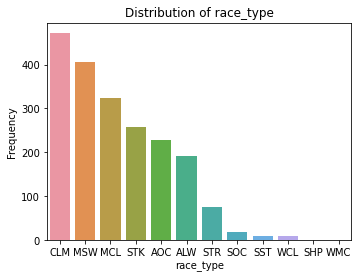

In [45]:
plot_bar(race_df,'race_type','track_id','lightblue')


We can observe that 471 of the 2000 races are claiming races, closely followed by 406 maiden special weight races, 325 maiden claiming races. These 3 account for more than 55% of the races. Stakes, the most prestigious races are 0.5% of the total. 

Onto distances, a mean value of 725.85 furlongs is the race distance.

In [47]:
race_df['distance_id'].describe()

count    2000.000000
mean      725.850000
std       148.189938
min       450.000000
25%       600.000000
50%       700.000000
75%       800.000000
max      2000.000000
Name: distance_id, dtype: float64

Let's look at what is the standard distance of these horse races.

,0.0,1.0
Count,1979.00,21.00
Ratio(%),98.95,1.05


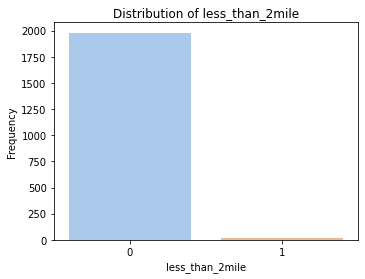

In [49]:
race_df['less_than_2mile']=race_df['distance_id'].apply(lambda x: 1 if x >=1200 else 0)
plot_bar(race_df,'less_than_2mile','track_id','lightblue')


That's very one-sided. It's important to know that almost 99% of the races have a distance of more than 12 furlongs. This would affect the horses's stamina and finish line racing tactics.

Following is the distribution of race post times.<br/>
For example, 1220 - 12.20 pm

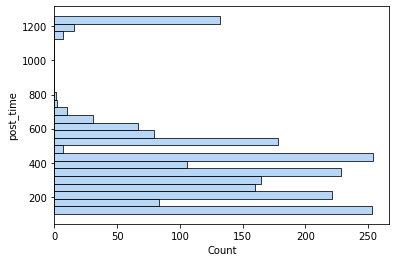

In [52]:
sns.histplot(data=race_df,y='post_time')


Most of the races seem to be held at a fixed day-time.

### 3. Data Visualisation - Start Table

The file we'll look at now is `nyra_start_table.csv`. <br/>
It consists of the following columns: <br/>

* **track_id** - 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.<br/>
* **race_date** - date the race took place. YYYY-MM-DD.<br/>
* **race_number** - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.<br/>
* **program_number** - Program number of the horse as 3 characters.The unique identifier of the horse in the race.<br/>
* **weight_carried** - An integer of the weight carried by the horse in the race.
* **jockey** - Name of the jockey on the horse in the race.<br/>
* **odds** - Odds to win the race passed as an integer. Divide by 100 to derive the odds to 1. Example - 1280 would be 12.8-1. <br/>
position_at_finish - An integer of the horse's finishing position.




In [54]:
start_df = pd.read_csv(path+'/nyra_start_table.csv')
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915 entries, 0 to 14914
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   track_id        14915 non-null  object
 1   race_date       14915 non-null  object
 2   race_number     14915 non-null  int64 
 3   program_number  14915 non-null  object
 4   weight_carried  14915 non-null  int64 
 5   jockey          14915 non-null  object
 6   odds            14915 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 815.8+ KB


None of the attributes have null values, so we proceed.

In [56]:
start_df.shape[0],start_df.shape[0]/len(start_df['jockey'].unique())


(14915, 83.79213483146067)

The above cell shows 14,315 horses are entered in all races (including duplicates), but there are only 178 jockeys in all. <br/>
Could it be true that on an average, each jockey has appeared approximately 83 times? <br/>It doesn't seem plausible.

The cell below plots the frequency jockey's weights.

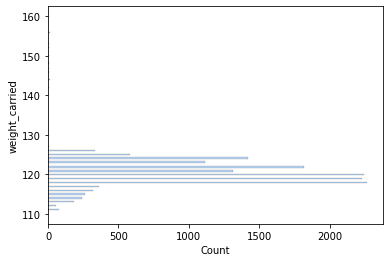

In [59]:
sns.histplot(data=start_df,y='weight_carried')


Most of the weights lie between 118-125 pounds (assuming pounds as it's not mentioned in the data description).

### 4. Data Visualation -  Tracking Table

Let's visualise the `nyra_tracking_table.csv`. This is the last of the 3 files.<br/>
The 4th one is a compilation of all 3. <br/>
* **track_id**: 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.<br/>
* **race_date**: date the race took place. YYYY-MM-DD.<br/>
There are 217 dates on which the race took place.<br/>
* **race_number**: Number of the race.<br/> Up to 13 races are registered.
* **program_number**: Program number of the horse in the race passed as 3 characters. The unique identifier of the horse in the race.<br/>
* **trakus_index**: The common collection of point of the lat / long of the horse in the race passed as an integer. From what we can tell, it's collected every 0.25 seconds.<br/>
Information at 264 measurements up to 75%.
* **latitude**: The latitude of the horse in the race passed as a float.<br/>
* **longitude**: The longitude of the horse in the race passed as a float.<br/>

In [62]:
track_df = pd.read_csv(path+'nyra_tracking_table.csv')

In [63]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   track_id        object 
 1   race_date       object 
 2   race_number     int64  
 3   program_number  object 
 4   trakus_index    int64  
 5   latitude        float64
 6   longitude       float64
dtypes: float64(2), int64(2), object(3)
memory usage: 279.2+ MB


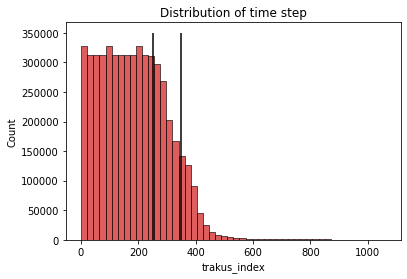

In [64]:
sns.histplot(data=track_df,x='trakus_index',color='tab:red',bins=50);
plt.title('Distribution of time step');
plt.vlines(x=250,ymin=0,ymax=0.35*1000**2);
plt.vlines(x=350,ymin=0,ymax=0.35*1000**2);

With [Trakus](https://www.keeneland.com/racing/trakus), one can track full field running order, total distance traveled and average speed at various places in the race. <br/>
Here also, `trakus_index` is number of measurements. The number of measurements remained almost the same until the 250th measurement.

Now let's visualise the shape and altitude of the race track.

In [65]:
def get_track_id(df,track_id_): 
    temp_df = df[df.track_id==track_id_]
    temp_df = temp_df.sample(n=int(temp_df.shape[0]/10),random_state=42)
    return temp_df

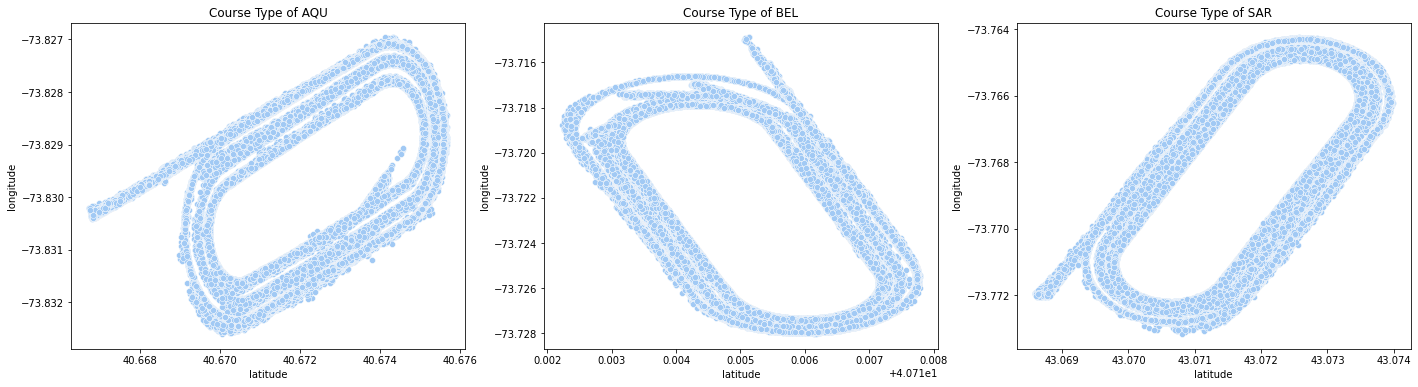

In [66]:
plt.figure(figsize=[24,6])

plt.subplot(1,3,1)
track_id = 'AQU'
temp_df=get_track_id(track_df,track_id)
sns.scatterplot(data=temp_df,x='latitude',y='longitude');
plt.title('Course Type of '+str(track_id));

plt.subplot(1,3,2)
track_id = 'BEL'
temp_df=get_track_id(track_df,track_id)
sns.scatterplot(data=temp_df,x='latitude',y='longitude');
plt.title('Course Type of '+str(track_id));

plt.subplot(1,3,3)
track_id = 'SAR'
temp_df=get_track_id(track_df,track_id)
sns.scatterplot(data=temp_df,x='latitude',y='longitude');
plt.title('Course Type of '+str(track_id));

The racetrack is shaped like an oval track with an additional straight track. 
The inner turf will be towards the inner oval-boundary. The outer oval-boundary is a dirt track.